In [1]:
!pip install xgboost

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Asteroid_Updated.csv')


# Let's take our first look
print("\nFirst 5 rows of data:")
df.head(15)

/tmp/ipython-input-2375084834.py:4: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Asteroid_Updated.csv')



First 5 rows of data:


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
5,Hebe,2.425160,0.203007,14.737901,138.640203,239.807490,1.932835,2.917485,3.776755,62329.0,...,0.399,NaN,S,S,0.24,0.973965,MBA,0.260972,1379.459705,86.197923
6,Iris,2.385334,0.231206,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452.0,...,0.484,NaN,S,S,NaN,0.846100,MBA,0.267535,1345.619196,140.419656
7,Flora,2.201764,0.156499,5.886955,110.889330,285.287462,1.857190,2.546339,3.267115,62655.0,...,0.489,NaN,NaN,S,0.28,0.874176,MBA,0.301681,1193.313717,194.882895
8,Metis,2.385637,0.123114,5.576816,68.908577,6.417369,2.091931,2.679342,3.684806,61821.0,...,0.496,NaN,NaN,S,0.17,1.106910,MBA,0.267484,1345.875362,276.861623
9,Hygiea,3.141539,0.112461,3.831560,283.202167,312.315206,2.788240,3.494839,5.568291,62175.0,...,0.351,NaN,C,C,NaN,1.778390,MBA,0.177007,2033.818284,152.184851


In [5]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

In [6]:
df.shape

(839714, 31)

In [7]:
df.isna().sum()

,0
name,817747
a,2
e,0
i,0
om,0
w,0
q,0
ad,6
per_y,1
data_arc,15474


In [9]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 


In [10]:
# Create a new dataframe for our cleaned data
df_cleaned = df.copy()

# Step 1: Drop all rows where our target 'pha' is null
df_cleaned = df_cleaned.dropna(subset=['pha'])

# Step 2: Convert 'pha' from text ('Y'/'N') to a number (1/0)
# We assume 'Y' means 1 (Hazardous) and 'N' means 0 (Not Hazardous)
df_cleaned['pha'] = df_cleaned['pha'].apply(lambda x: 1 if x == 'Y' else 0)

print(f"Original rows: {len(df)}, Rows after dropping null 'pha': {len(df_cleaned)}")
print(f"Unique 'pha' values: {df_cleaned['pha'].unique()}")

Original rows: 839714, Rows after dropping null 'pha': 823272
Unique 'pha' values: [0 1]


In [11]:
# List of columns to drop
drop_cols = [
    'name',      # Irrelevant for prediction
    'diameter',  # >90% missing
    'extent',    # >99% missing
    'albedo',    # >90% missing
    'rot_per',   # >90% missing
    'GM',        # >99% missing
    'BV',        # >99% missing
    'UB',        # >99% missing
    'IR',        # >99% missing
    'spec_B',    # >99% missing
    'spec_T',    # >99% missing
    'G'          # >99% missing
]

df_cleaned = df_cleaned.drop(columns=drop_cols)
print(f"Total columns dropped: {len(drop_cols)}")

Total columns dropped: 12


In [12]:
df_cleaned.isna().sum()

,0
a,2
e,0
i,0
om,0
w,0
q,0
ad,6
per_y,1
data_arc,410
condition_code,13


In [13]:
# Get a list of all numeric columns
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns

# Loop through each numeric column and fill missing values with the median
for col in numeric_cols:
    median_val = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_val)

print("Filled missing values in all numeric columns with their median.")

Filled missing values in all numeric columns with their median.


In [14]:
print("\n--- Inspecting remaining 'object' columns ---")

# 'neo' (Near-Earth Object)
print(f"Unique 'neo' values: {df_cleaned['neo'].unique()}")
print(f"Nulls in 'neo': {df_cleaned['neo'].isnull().sum()}")

# 'class' (Orbital Class)
print(f"\nUnique 'class' values: {df_cleaned['class'].unique()}")
print(f"Nulls in 'class': {df_cleaned['class'].isnull().sum()}")

# 'condition_code'
print(f"\nUnique 'condition_code' values: {df_cleaned['condition_code'].unique()}")
print(f"Nulls in 'condition_code': {df_cleaned['condition_code'].isnull().sum()}")


--- Inspecting remaining 'object' columns ---
Unique 'neo' values: ['N' 'Y' nan]
Nulls in 'neo': 6

Unique 'class' values: ['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO' 'IEO'
 'HYA' 'PAA']
Nulls in 'class': 0

Unique 'condition_code' values: [0 2 1 4 3 5 nan '0' '1' '2' '3' '4' '8' '9' '7' '6' '5' 9.0 7.0 6.0 8.0]
Nulls in 'condition_code': 13


In [15]:
print("\n--- Final Info After Cleaning ---")
df_cleaned.info()


--- Final Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 823272 entries, 0 to 839713
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               823272 non-null  float64
 1   e               823272 non-null  float64
 2   i               823272 non-null  float64
 3   om              823272 non-null  float64
 4   w               823272 non-null  float64
 5   q               823272 non-null  float64
 6   ad              823272 non-null  float64
 7   per_y           823272 non-null  float64
 8   data_arc        823272 non-null  float64
 9   condition_code  823259 non-null  object 
 10  n_obs_used      823272 non-null  int64  
 11  H               823272 non-null  float64
 12  neo             823266 non-null  object 
 13  pha             823272 non-null  int64  
 14  moid            823272 non-null  float64
 15  class           823272 non-null  object 
 16  n               823272 non

In [16]:
# Drop the few remaining rows with nulls
rows_before = len(df_cleaned)
df_cleaned = df_cleaned.dropna(subset=['condition_code', 'neo'])
rows_after = len(df_cleaned)

print(f"Rows before final drop: {rows_before}")
print(f"Rows after final drop: {rows_after}")
print(f"Total rows dropped: {rows_before - rows_after}")

Rows before final drop: 823272
Rows after final drop: 823259
Total rows dropped: 13


In [17]:
# 1. Encode 'neo' (Binary Encoding)
df_cleaned['neo'] = df_cleaned['neo'].apply(lambda x: 1 if x == 'Y' else 0)
print("Encoded 'neo' column (Y=1, N=0)")

# 2. Encode 'condition_code' (Standardize to Numeric)
# This converts all values (floats, strings) into a single integer type
df_cleaned['condition_code'] = df_cleaned['condition_code'].astype(float).astype(int)
print("Encoded 'condition_code' column (standardized to integer)")

# 3. Encode 'class' (One-Hot Encoding)
# This will create 14 new columns (e.g., 'class_MBA', 'class_OMB')
# and drop the original 'class' column.
df_cleaned = pd.get_dummies(df_cleaned, columns=['class'], drop_first=False)
print("Encoded 'class' column (using one-hot encoding)")

print("\nAll object columns have been encoded.")

Encoded 'neo' column (Y=1, N=0)
Encoded 'condition_code' column (standardized to integer)
Encoded 'class' column (using one-hot encoding)

All object columns have been encoded.


In [18]:
print("\n--- FINAL POST-CLEANING INFO ---")
df_cleaned.info()


--- FINAL POST-CLEANING INFO ---
<class 'pandas.core.frame.DataFrame'>
Index: 823259 entries, 0 to 839713
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               823259 non-null  float64
 1   e               823259 non-null  float64
 2   i               823259 non-null  float64
 3   om              823259 non-null  float64
 4   w               823259 non-null  float64
 5   q               823259 non-null  float64
 6   ad              823259 non-null  float64
 7   per_y           823259 non-null  float64
 8   data_arc        823259 non-null  float64
 9   condition_code  823259 non-null  int64  
 10  n_obs_used      823259 non-null  int64  
 11  H               823259 non-null  float64
 12  neo             823259 non-null  int64  
 13  pha             823259 non-null  int64  
 14  moid            823259 non-null  float64
 15  n               823259 non-null  float64
 16  per             823259 non-

--- Target Variable Counts ---
pha
0    821244
1      2015
Name: count, dtype: int64


Percentage of Hazardous Asteroids (PHAs): 0.2448%
Percentage of Non-Hazardous Asteroids: 99.7552%


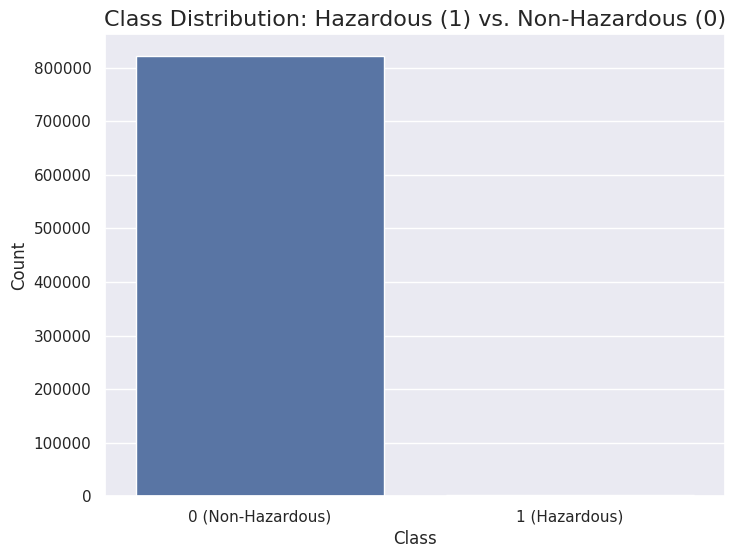

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for our plots
sns.set(style="darkgrid")

# Get the value counts of our target variable 'pha'
pha_counts = df_cleaned['pha'].value_counts()
print("--- Target Variable Counts ---")
print(pha_counts)
print("\n")

# Calculate the percentage
percentage_hazardous = (pha_counts[1] / len(df_cleaned)) * 100
print(f"Percentage of Hazardous Asteroids (PHAs): {percentage_hazardous:.4f}%")
print(f"Percentage of Non-Hazardous Asteroids: {100 - percentage_hazardous:.4f}%")

# Visualize the imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='pha', data=df_cleaned)
plt.title('Class Distribution: Hazardous (1) vs. Non-Hazardous (0)', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['0 (Non-Hazardous)', '1 (Hazardous)'])
plt.show()

In [20]:
# Save our 100% clean and encoded dataframe to a file
df_cleaned.to_parquet('asteroid_cleaned.parquet')

print("Cleaned data saved to 'asteroid_cleaned.parquet'!")

Cleaned data saved to 'asteroid_cleaned.parquet'!
